Import Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


Load and Preprocess the data

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1 by dividing by 255
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize the data

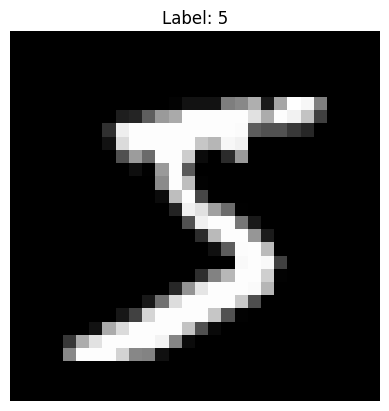

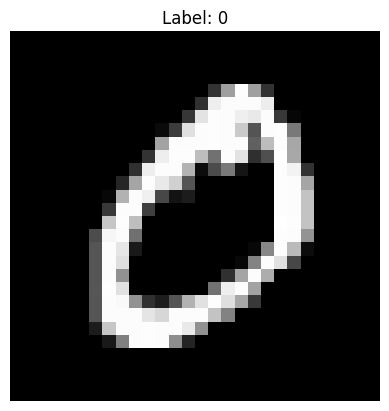

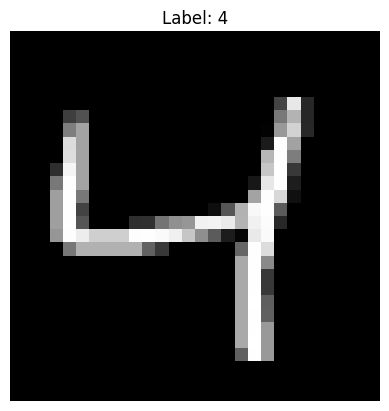

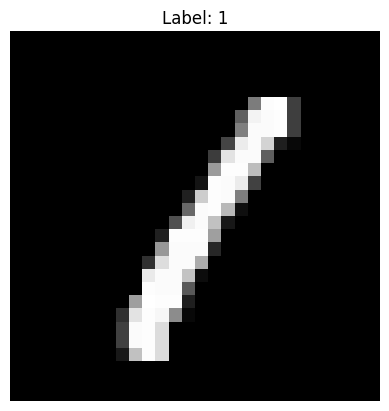

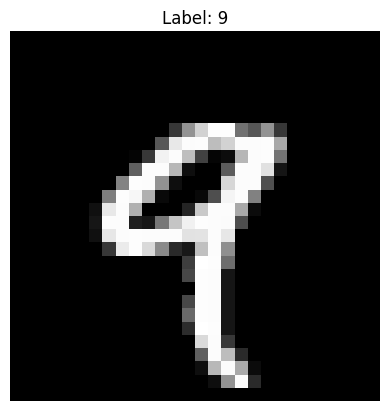

In [3]:
# Display the first 5 images from the training dataset with labels
for i in range(5):
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()


Define the Model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Train the model

In [6]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.9057 - loss: 0.3125 - val_accuracy: 0.9830 - val_loss: 0.0496
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9851 - loss: 0.0493 - val_accuracy: 0.9859 - val_loss: 0.0431
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9905 - loss: 0.0335 - val_accuracy: 0.9903 - val_loss: 0.0301
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9932 - loss: 0.0222 - val_accuracy: 0.9901 - val_loss: 0.0296
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 35ms/step - accuracy: 0.9948 - loss: 0.0168 - val_accuracy: 0.9902 - val_loss: 0.0323


Evaluate the model

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9874 - loss: 0.0422
Test Accuracy: 99.02%


Make predictions

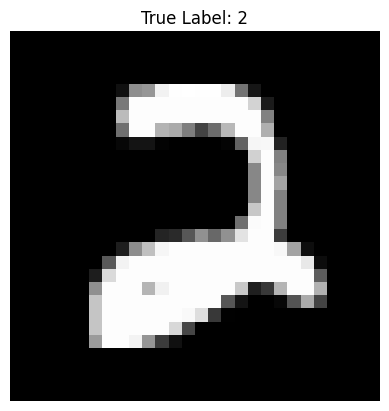

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Predicted Label: 2


In [8]:
import numpy as np

# Select a random test image
index = np.random.randint(0, len(x_test))
image = x_test[index]

# Display the test image
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {y_test[index]}")
plt.axis('off')
plt.show()

# Make prediction
prediction = model.predict(image.reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction)
print(f"Predicted Label: {predicted_label}")


Plot Training and validation Accuracy

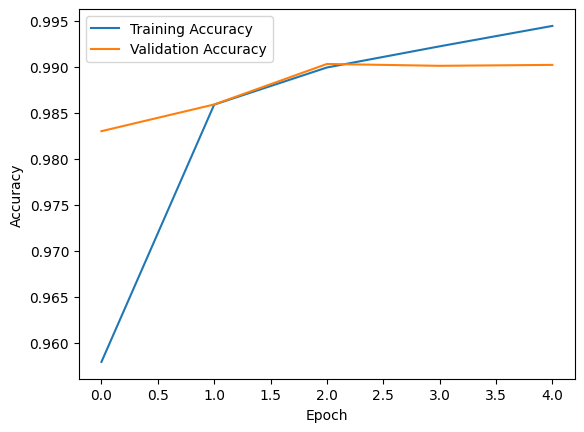

In [9]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
